## Analysis of Simulation Results

ABM in which agents walk over a field to collect and eat sugar. Based on [the ABM Sugarscape 3 Wealth Distribution](https://ccl.northwestern.edu/netlogo/models/Sugarscape3WealthDistribution).

Features:
- Heterogeneous ants: some need more food than others and some explore with a wider radius then others (high vs low senses).
- The amount of food (sugar) has a higher concentrations in some areas of the map.

No real ants were hurt in the experiments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df=pd.read_csv('ants.csv')
df.head()

,Unnamed: 0,RunId,iteration,Step,initial_population,recreate,internet,solidarity,individualist_percent,Living Ants,Dead Ants,% Dead Low Senses,% Dead High Senses,% Dead Individualist,min_sugar,max_sugar,avg_sugar,stdev_sugar
0,0,1,0,1000,100,0,False,False,0,62,38,0.657895,0.342105,0.0,139.0,2020.0,1381.209677,481.042009
1,1,3,0,1000,100,0,False,False,0,68,32,0.562500,0.437500,0.0,246.0,2012.0,1285.147059,538.134874
2,2,4,0,1000,100,0,False,False,0,68,32,0.625000,0.375000,0.0,70.0,2016.0,1205.691176,565.457053
3,3,2,0,1000,100,0,False,False,0,67,33,0.515152,0.484848,0.0,115.0,2015.0,1362.343284,562.748304
4,4,0,0,1000,100,0,False,False,0,70,30,0.666667,0.333333,0.0,176.0,2015.0,1223.114286,577.336451


In [3]:
len(df)

400

In [4]:
categories = ['Living Ants','Dead Ants','% Dead Low Senses','% Dead High Senses','% Dead Individualist', "min_sugar", "max_sugar", "avg_sugar"]

In [5]:
MAX_ANTS = df[categories[0:2]].max().max()
MAX_SUGAR = df[categories[5:]].max().max()

In [6]:
def normalize_columns(df):
    cut_df = df[categories]
    a = cut_df[categories[0:2]]
    b = cut_df[categories[2:5]]
    c = cut_df[categories[5:]]
    an = a/MAX_ANTS
    cn = c/MAX_SUGAR
    return pd.concat([an,b,cn], axis=1)

### Internet
The internet option adds knowledge about the resource distribution for everyone.

In [7]:
no_internet = df[(df['internet'] == False) & (df['solidarity'] == False) & (df['individualist_percent'] == 0)]
internet = df[(df['internet'] == True) & (df['solidarity'] == False) & (df['individualist_percent'] == 0)]

no_internet_normalized = normalize_columns(no_internet)
internet_normalized = normalize_columns(internet)

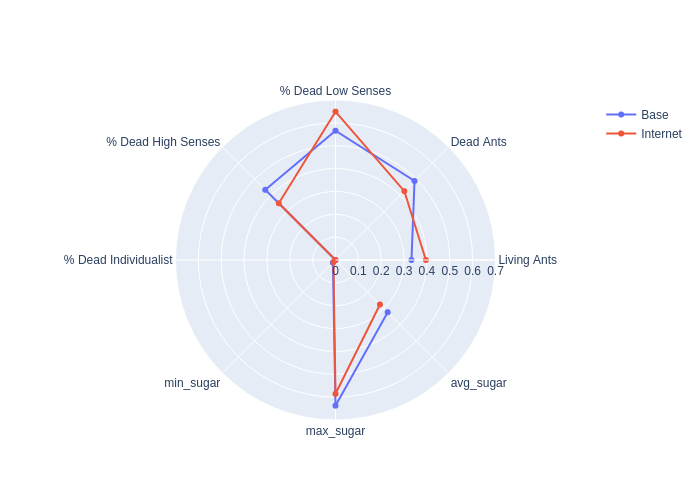

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=[no_internet_normalized[c].mean() for c in categories],
      theta=categories,
      name='Base'
))
fig.add_trace(go.Scatterpolar(
      r=[internet_normalized[c].mean() for c in categories],
      theta=categories,
      name='Internet'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.7]
    )),
  showlegend=True
)

fig.show("png")

#### Findings

Adding internet leads to slightly more living agents. However, this further adds to the disadvantage of the low senses agents. Their search and movement radius is smaller compared to the one of the high senses agents. Adding internet increases the percentage of dead low senses agents from 57% to 65%.

### Solidarity
The solidarity option adds a distribution hub to which everyone sends extra food and from where everyone can take food when in need. Transport cost was ignored.

In [9]:
no_solidarity = df[(df['solidarity'] == False) & (df['individualist_percent'] == 0)]
solidarity = df[(df['solidarity'] == True) & (df['individualist_percent'] == 0)]

no_solidarity_normalized = normalize_columns(no_solidarity)
solidarity_normalized = normalize_columns(solidarity)

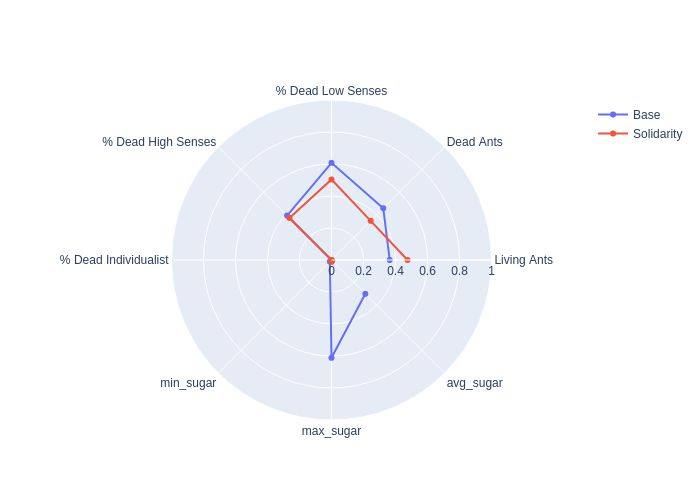

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=[no_solidarity_normalized[c].mean() for c in categories],
      theta=categories,
      name='Base'
))
fig.add_trace(go.Scatterpolar(
      r=[solidarity_normalized[c].mean() for c in categories],
      theta=categories,
      name='Solidarity'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show("png")

#### Findings

Adding solidarity distribution increases the number of living ants and decreases the disadvantage of low versus high senses ants. Also, there are ants with huge amounts of sugar.

### Individualists
This checks if and at which percentage agents not contributing to the solidarity principle have an impact on the system.

In [11]:
percentages_individualists=[0, 1, 10, 50, 90]

impact_per_percentage = {
    percentage: df[(df['solidarity'] == True) & (df['individualist_percent'] == percentage)]
    for percentage in percentages_individualists
}

impact_per_percentage_normalized = {
    percentage: normalize_columns(impact) 
    for percentage, impact in impact_per_percentage.items()
}

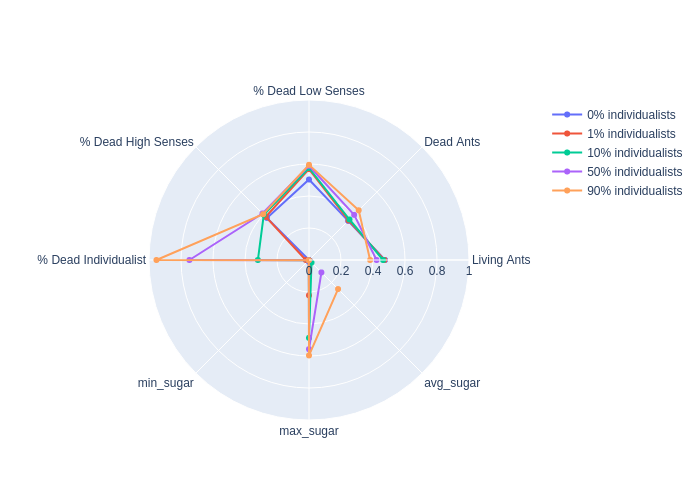

In [12]:
fig = go.Figure()

for percentage in percentages_individualists:
    fig.add_trace(go.Scatterpolar(
          r=[impact_per_percentage_normalized[percentage][c].mean() for c in categories],
          theta=categories,
          name=f"{percentage}% individualists"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show("png")

#### Findings

Individualists are at a higher death risk. E.g. with 50% individualists, 75% of all dead agents were individualists. This also has an impact on the increased rate of dead low senses ants. In terms of living ants and sugar distribution, up to 10% of individualists don't have a lot of impact.